Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных и месячных группах для Brent.

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

# Решение 

При определенных условиях, каждый из примеров может быть временным рядом 

- а) С большой-большой оговоркой. Нужен тайм-код от месяца. 
- б) Точно да
- в) Здесь оговорка: промышленный компьютер (на производстве), или компьютер, выполняющий ответственную работу. Временной ряд тут скорее нужен, чем нет. 
- г) Если это будет просто число, которое мы снимаем за день, то неинтересно, неинформативно и неполезно. Если будет добавка по адресу жильца, полу, возрасту и другим критериям, то тогда можно формировать и предсказывать загрузку по врачам. 
- д) для отдельных задач - да. По координате можно вычислить пройденное расстояние, посчитать скорость, посмотреть расход бензина и увидеть, был ли простой. На основе этих данных мы сможем сэкономить топливо. Значит можно, потому что интересно для бизнеса. 
- е) да

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
DUQ_path = 'C:/Users/Anatoly/Desktop/Time_rows/lesson_1/DUQ_hourly.csv'

In [5]:
df_DUQ = pd.read_csv(DUQ_path, index_col=[0], parse_dates=[0])
df_DUQ.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [6]:
df_DUQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


Iаг измерений по времени составляет 1 час. Общий объем данных составляет 119068 значений, тип измеряемой информации при записи был определен как float64. Пропусков нет. 

Оценим основные статистики

In [7]:
df_DUQ.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


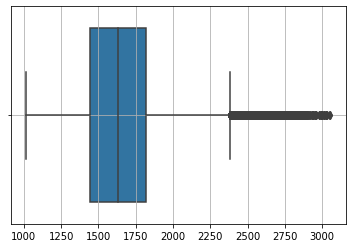

In [8]:
sns.boxplot(df_DUQ.values)
plt.show
plt.grid()

Проверка пропусков

In [9]:
df_DUQ['DUQ_MW'].isnull().sum()

0

Пропусков не оказалось

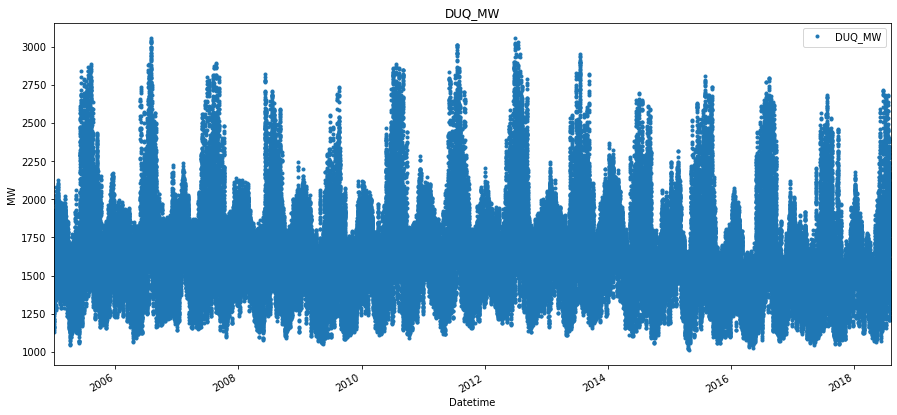

In [10]:
df_DUQ.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW' )
plt.ylabel ('MW')
plt.show()

### Обсуждение визуализации

- Основные статистики показали, что пропусков нет
- Визуальный анализ показывает что:
    - Предъявленные данные имеют циклы
    - Пик потребления - 2012 год. После этого периода максимальные значения с каждым годом становятся меньше. 

# Ресэмплинг brent по среднему значению на таймфрейме week, month.

In [11]:
brent_path = 'C:/Users/Anatoly/Desktop/Time_rows/lesson_1/нефть-brent 2010-2019.xlsx'
brent_data = pd.read_excel(brent_path, index_col=[0], parse_dates=[0])
brent_data.head(10)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59
2019-08-26,58.26
2019-08-25,57.81
2019-08-23,58.94
2019-08-22,60.05


In [12]:
brent_mean_w = brent_data.resample('W').mean()
brent_mean_w.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [13]:
brent_mean_m = brent_data.resample('M').mean()
brent_mean_m.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


# Графики

In [14]:
brent_std_w = brent_data.resample('W').std()
brent_std_m = brent_data.resample('M').std()

brent_year_mean = brent_data.resample('Y').mean()
brent_year_std = brent_data.resample('Y').std()

In [15]:
brent_mean_w.loc[brent_mean_w['Значение'].isnull(), :]

,Значение
Дата,
2011-10-16,NaN


In [16]:
a = brent_mean_w.loc['2011-10-09', 'Значение'] 
b = brent_mean_w.loc['2011-10-23', 'Значение']

In [17]:
brent_mean_w.loc['2011-10-16', 'Значение'] = (a + b) / 2
brent_mean_w.loc['2011-10-09': '2011-10-23', :]

,Значение
Дата,
2011-10-09,103.476667
2011-10-16,106.616667
2011-10-23,109.756667


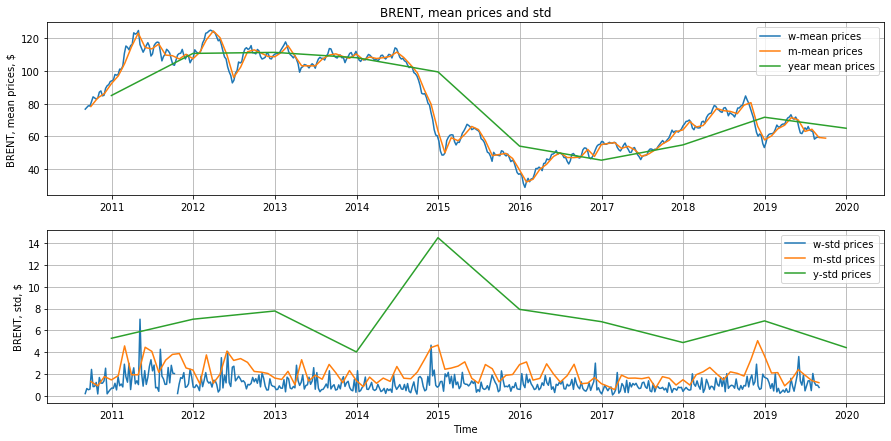

In [21]:
plt.figure(figsize=(15, 7))

plt.subplot(211)
plt.ylabel('BRENT, mean prices, $')
plt.plot(brent_mean_w.index, brent_mean_w, label='w-mean prices' )
plt.plot(brent_mean_m.index, brent_mean_m, label='m-mean prices')
plt.plot(brent_year_mean.index, brent_year_mean, label='year mean prices')
plt.legend()
plt.grid()

plt.title('BRENT, mean prices and std')

plt.subplot(212)
plt.ylabel('BRENT, std, $')
plt.plot(brent_std_w.index, brent_std_w, label='w-std prices' )
plt.plot(brent_std_m.index, brent_std_m, label='m-std prices')
plt.plot(brent_year_std.index, brent_year_std, label='y-std prices')
plt.legend()
plt.grid()

plt.xlabel('Time')
plt.show()

Выводы: 

- на месячных и недельных графиках сложно увидеть тренд. Тогда как на годовом он выявляется просто. Поэтому в трейдинговых компаниях совмещают просмотр различных таймфреймов при торговле и извлечении прибыли. 